In [29]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from time import sleep
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd

In [94]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [42]:
# set configuration
num_t_steps = 100
step_size = 0.1 * np.pi
t = np.arange(1, num_t_steps+1) * step_size

# classificatiom
test_size = 0.2
cv = 5
cv_config = [test_size, cv]

In [47]:
num_t_steps = 10
step_size = 0.1 * np.pi
t = np.arange(1, num_t_steps+1) * step_size
t

array([0.31415927, 0.62831853, 0.9424778 , 1.25663706, 1.57079633,
       1.88495559, 2.19911486, 2.51327412, 2.82743339, 3.14159265])

In [43]:
# reading data
train_data = pd.read_csv('graphwave_ac_train.csv')
test_data = pd.read_csv('graphwave_ac_test.csv')

In [44]:
ecf_df = dem.get_ecf(train_data, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.999995,0.999980,0.999955,0.999921,0.999877,0.999823,0.999760,0.999688,0.999607,0.999517,...,0.002195,0.002139,0.002084,0.002028,0.001972,0.001917,0.001861,0.001805,0.001749,B5_0
1,0.999996,0.999983,0.999962,0.999932,0.999894,0.999848,0.999794,0.999732,0.999662,0.999585,...,0.000658,0.000660,0.000665,0.000671,0.000681,0.000692,0.000706,0.000722,0.000740,B5_0
2,0.999995,0.999981,0.999958,0.999925,0.999884,0.999833,0.999774,0.999706,0.999629,0.999544,...,0.001164,0.001141,0.001119,0.001099,0.001080,0.001063,0.001047,0.001033,0.001020,B5_0


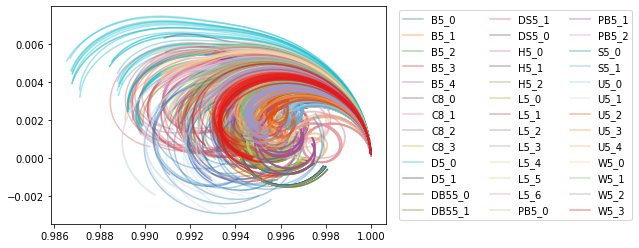

In [45]:
dem.get_ecf_plot(ecf_df,t)

In [102]:
num_steps_list = np.arange(2,10,2)
step_size_list = np.arange(0,2,0.1)*np.pi

In [105]:
res_svm = cm.cv_numsteps_ecf(num_steps_list, step_size_list, test_data, train_data, cv_config, 1)

  0%|          | 0/4 [00:00<?, ?it/s]

In [103]:
res_lr = cm.cv_numsteps_ecf(num_steps_list, step_size_list, test_data, train_data, cv_config, 2)

  0%|          | 0/4 [00:00<?, ?it/s]

In [127]:
import json
res_svm['num_steps_list'] = [int(i) for i in res_svm['num_steps_list']]
res_svm['step_size_list'] = res_svm['step_size_list'].tolist()

res_lr['num_steps_list'] = [int(i) for i in res_lr['num_steps_list']]
res_lr['step_size_list'] = res_lr['step_size_list'].tolist()

with open('results/ecf/res_svm.json', 'w') as f:
    json.dump(res_svm, f)
    
with open('results/ecf/res_lr.json', 'w') as f:
    json.dump(res_lr, f)

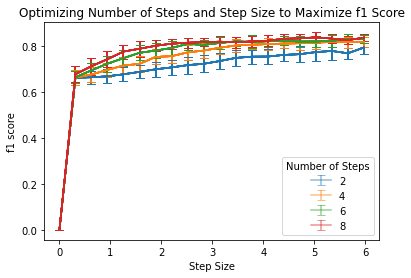

In [146]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
          '#393b79', '#637939', '#8c6d31', '#d6616b', '#7b4173', '#ce6dbd', '#5254a3', '#8ca252', '#bd9e39', '#ad494a']
handles = []
for n, color in zip(range(len(res_svm['num_steps_list'])), colors):
    for i in range(len(res_svm['step_size_list'])):
        #hh = plt.plot(res_svm['step_size_list'], res_svm['f1'][n], alpha=0.2, label=res_svm['num_steps_list'][n], c=color)
        hh = ax.errorbar(res_svm['step_size_list'], res_svm['f1'][n], yerr= res_svm['std'][n], capsize=4, label=res_svm['num_steps_list'][n], c=color, alpha =0.5)
    handles.append(hh[0] if isinstance(hh, list) else hh)
    plt.legend(handles=handles, title='Number of Steps')
    plt.title('Optimizing Number of Steps and Step Size to Maximize f1 Score')
    plt.xlabel('Step Size')
    plt.ylabel('f1 score')